### Library Imports

In [1]:
%%time
# Standard Library Imports
import os

# Third Party Imports
import ants
import tifffile
import numpy as np

# Local Imports
from clearex.plot.images import mips
from clearex.plot.data import histograms
from clearex.stats.intensity import compare_intensity
from tests import download_test_registration_data

CPU times: user 1.7 s, sys: 533 ms, total: 2.24 s
Wall time: 4.72 s


### Data Paths

In [2]:
%%time
output_path = download_test_registration_data()

fixed_path = os.path.join(
    output_path,
    "clearex",
    "cropped_fixed.tif")

moving_path = os.path.join(
    output_path,
    "clearex",
    "cropped_moving.tif")

transform_path = os.path.join(
    output_path,
    "clearex",
    "GenericAffine.mat")

transform_list = [transform_path]

registered_path = os.path.join(
    output_path,
    "clearex",
    "registered.tif")


Downloaded to downloaded_data.zip
Extracted downloaded_data.zip directory.
CPU times: user 978 ms, sys: 2.06 s, total: 3.03 s
Wall time: 1min 38s


### Import Data and Plot Maximum Intensity Projections

In [3]:
%%time
fixed_image = tifffile.imread(fixed_path)
moving_image = tifffile.imread(moving_path)

CPU times: user 25.4 ms, sys: 18.4 ms, total: 43.8 ms
Wall time: 46.3 ms


### Plot Maximum Intensity Projections

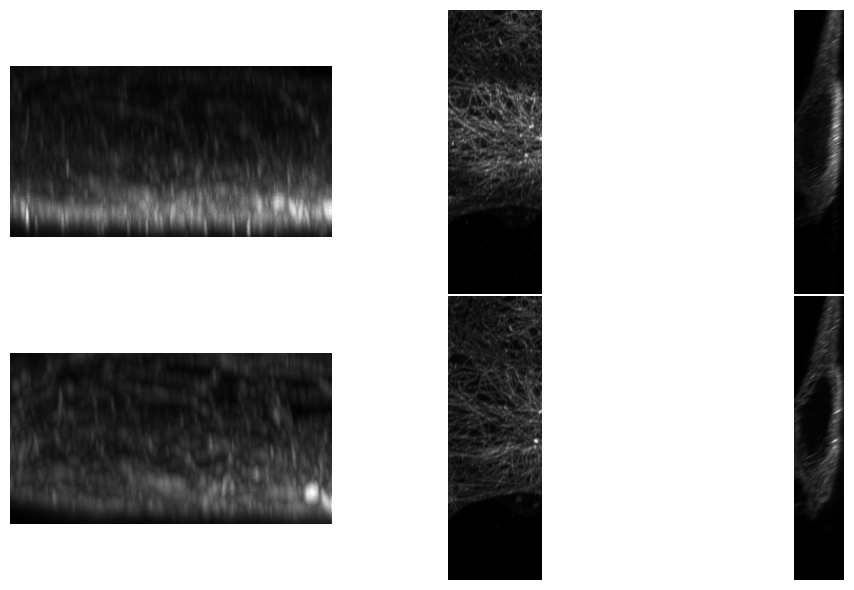

In [4]:
mips(fixed_image, moving_image)

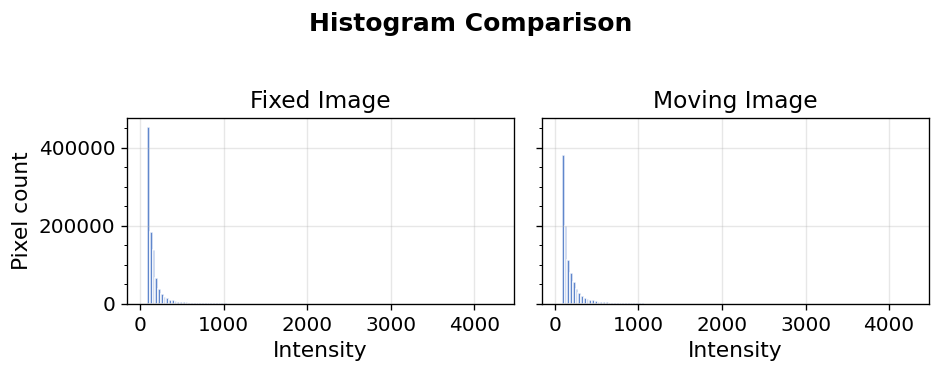

In [5]:
histograms(fixed_image, moving_image, bins=128, labels=("Fixed Image", "Moving Image"), sample=1_000_000)

### Convert to Ants images.

In [6]:
%%time
fixed_image = ants.from_numpy(fixed_image)
moving_image = ants.from_numpy(moving_image)


CPU times: user 125 ms, sys: 67.1 ms, total: 192 ms
Wall time: 201 ms


### Apply transformation and iteratively evaluate correspondence between intensity distributions

In [7]:
registered_image = ants.apply_transforms(
    fixed=fixed_image,
    moving=moving_image,
    transformlist=transform_list,
    interpolator="linear")

for match_points in [64, 128, 256, 512, 1024, 2048]:
    histogram_matched_image = ants.histogram_match_image(
        source_image=registered_image,
        reference_image=fixed_image,
        number_of_match_points=match_points,
        use_threshold_at_mean_intensity=True
    )
    print(f"\nHistogram-match points: {match_points}")
    compare_intensity(histogram_matched_image.numpy().astype(np.uint16),
                        fixed_image.numpy().astype(np.uint16),
                        max_sample=50_000,
                        use_hist_wasserstein=True)


Histogram-match points: 64
KS D = 0.5059 | p = 0 | Reject H₀ → distributions differ
Wasserstein distance = 34.70 ADU


Histogram-match points: 128
KS D = 0.5059 | p = 0 | Reject H₀ → distributions differ
Wasserstein distance = 34.53 ADU


Histogram-match points: 256
KS D = 0.5059 | p = 0 | Reject H₀ → distributions differ
Wasserstein distance = 34.47 ADU


Histogram-match points: 512
KS D = 0.5059 | p = 0 | Reject H₀ → distributions differ
Wasserstein distance = 34.44 ADU


Histogram-match points: 1024
KS D = 0.5059 | p = 0 | Reject H₀ → distributions differ
Wasserstein distance = 34.43 ADU


Histogram-match points: 2048
KS D = 0.5059 | p = 0 | Reject H₀ → distributions differ
Wasserstein distance = 34.43 ADU

